<a href="https://colab.research.google.com/github/Arif111866/Machine_learning_LAB/blob/main/Random_forest_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest
 is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression. This helps in improving accuracy and reducing errors.

#Working of Random Forest Algorithm
Create Many Decision Trees: <br>
Pick Random Features: <br>
Combine the Predictions: <br>
Why It Works Well: Using random data and features for each tree helps avoid overfitting and makes the overall prediction more accurate and trustworthy.

#Key Features of Random Forest
Handles Missing Data: <br>
Shows Feature Importance:  <br>
Works Well with Big and Complex Data: <br>
Used for Different Tasks:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [12]:
iris = load_iris()

# Convert to DataFrame for convenience
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# Map target integers to species names (optional but clearer)
iris_data['species'] = iris_data['target'].map(dict(enumerate(iris.target_names)))
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# Features and labels
X = iris_data[iris.feature_names]
y = iris_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# X_test.shape
X_train.shape

(120, 4)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)
predicted_class = iris.target_names[prediction[0]]
print("Sample Features:")
print(sample.to_dict(orient="records")[0])
print(f"Predicted Class: {predicted_class}")


Sample Features:
{'sepal length (cm)': 6.1, 'sepal width (cm)': 2.8, 'petal length (cm)': 4.7, 'petal width (cm)': 1.2}
Predicted Class: versicolor


Feature Importances (Gini-based):
petal length (cm): 0.4400
petal width (cm): 0.4215
sepal length (cm): 0.1081
sepal width (cm): 0.0304


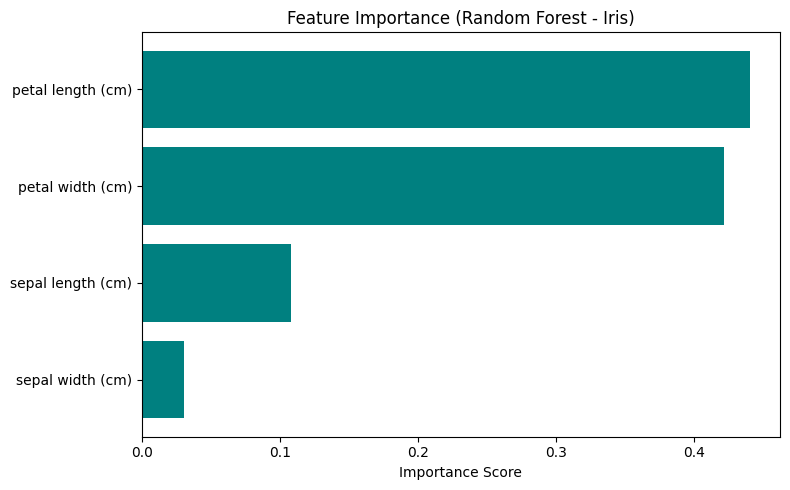

In [10]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort and visualize
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances (Gini-based):")
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.barh([f[0] for f in feature_importance], [f[1] for f in feature_importance], color='teal')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest - Iris)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [35]:
def ConMat(cm):
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()


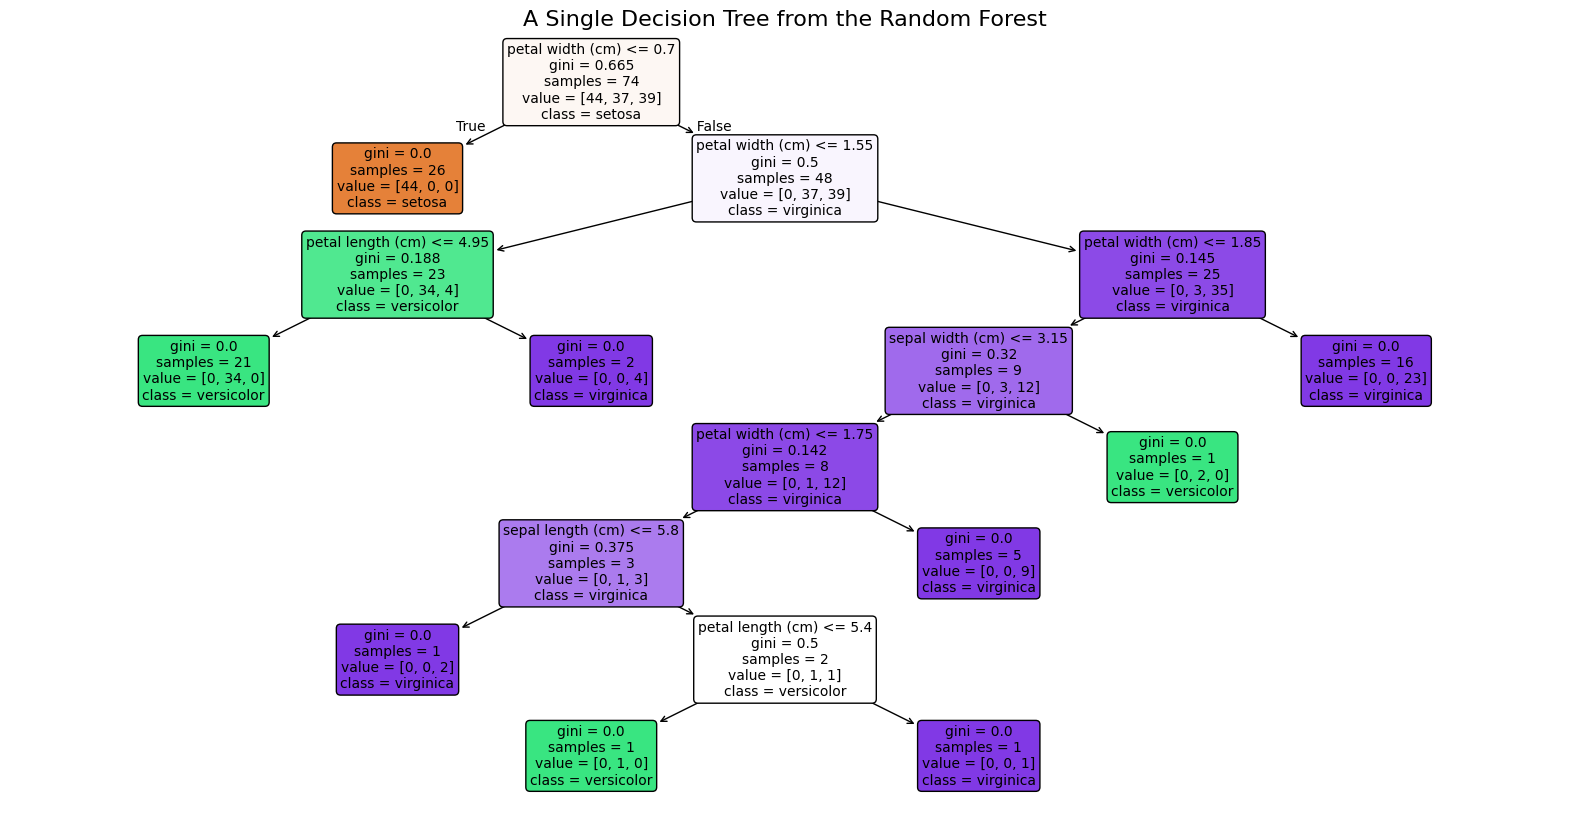

In [25]:
# Step 5: Pick One Tree (e.g. the first tree)
tree = rf_classifier.estimators_[0]

# Step 6: Plot the Tree
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("A Single Decision Tree from the Random Forest", fontsize=16)
plt.show()


/
.






<br>
<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3, 'Sex': 1, 'Age': 28.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458}
Predicted Survival: Did Not Survive



Feature Importances:
Fare: 0.3046
Sex: 0.2713
Age: 0.2600
Pclass: 0.0778
SibSp: 0.0495
Parch: 0.0368


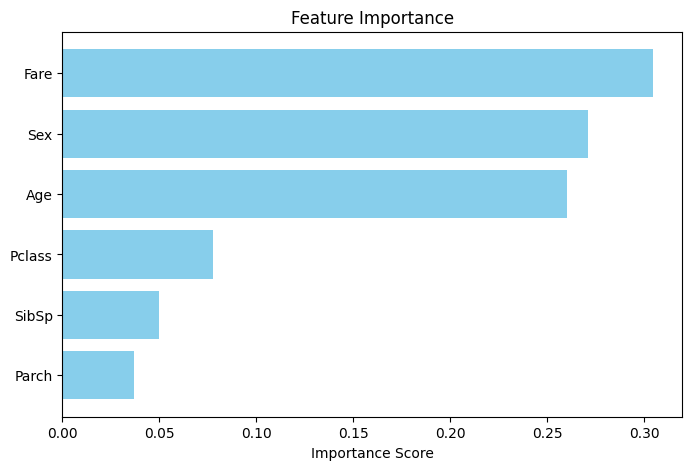

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Combine and sort
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")

# Optional: Visualize with a bar plot
plt.figure(figsize=(8, 5))
plt.barh([f[0] for f in feature_importance], [f[1] for f in feature_importance], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
print(rf_regressor.criterion)

NameError: name 'rf_regressor' is not defined

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81
